# Portfolio Optimization Examples
*Alan Kessler and Anil Koluguri, MSDS 460 Section 56*

Import **optimization.py** created for the project.

In [1]:
%matplotlib inline
import json
import optimization

A portfolio can be saved as a JSON file for documentation purposes. It represents the amount invested in each asset. The amount stored in an assumed risk-free asset is shown with symbol `RISK-FREE`.

In [2]:
current_file = open("portfolio_example.json")
current_port = json.load(current_file)
current_file.close()
current_port

{'AAPL': 1000,
 'MSFT': 2000,
 'INTC': 1000,
 'AMZN': 0,
 'GOOGL': 3000,
 'NFLX': 3000}

The script downloads historical daily returns for the investments in the portfolio, ignoring the risk free asset which is assumed theoretical. The data is from Yahoo Finance and the connection may be restricted, so restart and try again if an error is returned.

In [3]:
stock_data = optimization.calc_port_returns(list(current_port.keys()), 
                                            start_date='2018-01-01',
                                            end_date='2018-12-31')
stock_data.head()

,AAPL,MSFT,INTC,AMZN,GOOGL,NFLX
Date,,,,,,
2018-01-03,-0.000174,0.004643,-0.034527,0.012694,0.016917,0.019601
2018-01-04,0.004634,0.008763,-0.018509,0.004466,0.003877,0.002825
2018-01-05,0.011321,0.012322,0.006953,0.016033,0.013173,0.020981
2018-01-08,-0.003721,0.001020,0.000000,0.014322,0.003524,0.009762
2018-01-09,-0.000115,-0.000680,-0.025352,0.004665,-0.001275,-0.013006


The optimization script minimizes the standard deviation of the daily returns. It is possible to incorporate a percentage commission for transactions as well as a minimum return requirement.

In [4]:
opt_port, _port_stats = optimization.optimize_portfolio(current_port, 
                                                        stock_data,
                                                        cost=0.01,
                                                        risk_free=0.00007,
                                                        growth=0.0004,
                                                        verbose=True)

Academic license - for non-commercial use only
AAPL: 0.00, Return: -0.0293%, Buy: 0.00, Sell: 1000.00
MSFT: 1740.68, Return: 0.0737%, Buy: 0.00, Sell: 259.32
INTC: 0.00, Return: 0.0106%, Buy: 0.00, Sell: 1000.00
AMZN: 1165.00, Return: 0.0935%, Buy: 1165.00, Sell: 0.00
GOOGL: 0.00, Return: -0.0107%, Buy: 0.00, Sell: 3000.00
NFLX: 1059.58, Return: 0.1144%, Buy: 0.00, Sell: 1940.42
RISK-FREE: 5951.09, Buy: 5951.09, Sell: 0.00
Minimum Daily Volatility = 0.7996%
Expected Daily Return = 0.0400%


The new minimal risk portfolio is also stored as a dictionary.

This portfolio can also be saved as a JSON file for documentation. This makes it possible to update the optimal portfolio as new data becomes available.

In [5]:
with open("updated_portfolio.json", "w") as opt_port_file:
    json.dump(opt_port , opt_port_file) 

There is also the option to visualize the various portfolio options including individual stocks, the efficient frontier, and the capital allocation line.

When the risk free asset is used, the resulting portfolio be on the capital allocation line. The mix between the optimal risky porfolio and risk free asset is based on risk preferences.

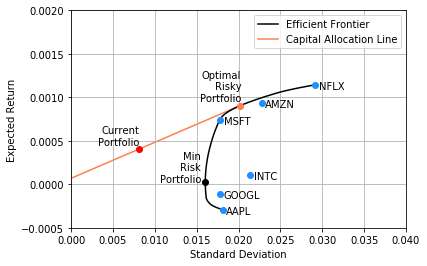

In [6]:
optimization.efficient_frontier(opt_port, 
                                stock_data, 
                                risk_free=0.00007)